# W207 Group Project: Real vs Fake News 
#### Members: Akiko Iwamizu, Allison Fox, Jason Yang, Rohin Chabra

## Import & Clean Data

In [156]:
# Load libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile

import time
import re
import nltk
import string

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

In [57]:
!pwd

/Users/akikoiwamizu/Documents/Documents - Akiko’s iMac 27"/GitHub/w207-project


In [15]:
# Read in fake news data file.
fake_zip = zipfile.ZipFile("input/fake-and-real-news-dataset/Fake.csv.zip") 
fake = pd.read_csv(fake_zip.open("Fake.csv"))
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [16]:
# Read in true news data file.
true_zip = zipfile.ZipFile("input/fake-and-real-news-dataset/True.csv.zip") 
true = pd.read_csv(true_zip.open("True.csv"))
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [87]:
# Create label columns for the fake news data set.
fake["label"] = "false"
fake["label_bin"] = 0
fake.shape

(23481, 6)

In [88]:
# Create label columns for the true news data set.
true["label"] = "true"
true["label_bin"] = 1
true.shape

(21417, 6)

In [89]:
# Merge + combine data sets into one.
data = [fake, true]
df = pd.concat(data, ignore_index=True)
df.shape

(44898, 6)

In [90]:
# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44898 non-null  object
 1   text       44898 non-null  object
 2   subject    44898 non-null  object
 3   date       44898 non-null  object
 4   label      44898 non-null  object
 5   label_bin  44898 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [92]:
# Confirm the population of each column.
print(f"Empty records:\n{df.isna().sum()}")

Empty records:
title        0
text         0
subject      0
date         0
label        0
label_bin    0
dtype: int64


In [101]:
# Pipeline for cleaning text inputs.
def preprocess_text(text, lemmatizer, wordTokenizer, stop_words):
    """Use regex and other tools for pre-processing of the text."""
    text = str(text).lower()
    text = re.sub("https?://\S+|www\.\S+", "", text)
    text = re.sub(" +", " ",text)
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", str(text))
    text = re.sub("https?://\S+|www\.\S+", "", text)
    text = re.sub("<.*?>+", "", text)
    text = re.sub("\n", "", text)
    text = " ".join([lemmatizer.lemmatize(w) for w in wordTokenizer.tokenize(text) if (w not in stop_words)])
    return text

In [112]:
# Clean up text features.
nltk.download("omw-1.4")
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

start_time = time.time()
stop_words = set(stopwords.words("english"))
lemmatizer = nltk.stem.WordNetLemmatizer()
wordTokenizer = nltk.tokenize.WhitespaceTokenizer()

df["clean_title"] = df["title"].apply(lambda text: preprocess_text(text, lemmatizer, wordTokenizer, stop_words))
df["clean_text"] = df["text"].apply(lambda text: preprocess_text(text, lemmatizer, wordTokenizer, stop_words))

print(f"{(time.time() - start_time):0.3f} seconds to execute pre-processing text inputs...")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/akikoiwamizu/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akikoiwamizu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akikoiwamizu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akikoiwamizu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


47.015 seconds to execute pre-processing text inputs...


In [113]:
df.head()

,title,text,subject,date,label,label_bin,clean_title,clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",false,0,donald trump sends embarrassing new year eve m...,donald trump wish american happy new year leav...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",false,0,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",false,0,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",false,0,trump obsessed even obama name coded website i...,christmas day donald trump announced would bac...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",false,0,pope francis called donald trump christmas speech,pope francis used annual christmas day message...


In [114]:
df["clean_title"].describe()

count                                         44898
unique                                        38672
top       factbox trump fill top job administration
freq                                             14
Name: clean_title, dtype: object

In [115]:
df["clean_text"].describe()

count     44898
unique    38315
top            
freq        716
Name: clean_text, dtype: object

In [151]:
df[df['clean_title'] == ''].head()

,title,text,subject,date,label,label_bin,clean_title,clean_text
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT,false,0,,
17432,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT,false,0,,
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT,false,0,,
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT,false,0,,
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT,false,0,,


In [128]:
df[df['clean_text'] == ''].head()

,title,text,subject,date,label,label_bin,clean_title,clean_text
9358,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,false,0,,
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",false,0,take poll think president trump pick replace j...,
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",false,0,joe scarborough berates mika brzezinski cheap ...,
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",false,0,watch tucker carlson scorch sanctuary city may...,
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017",false,0,mayor sanctuary city trump trying make u fugit...,


In [152]:
# Find & remove records where date column values are URLs.
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df.loc[df["date"].isnull()]
#print(f"Number of invalid date records: {len(df.loc[df['date'].isnull()])}")
#df = df.dropna(subset=["date"])

,title,text,subject,date,label,label_bin,clean_title,clean_text
9358,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,NaT,false,0,,
15507,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,NaT,false,0,,
15508,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,NaT,false,0,,
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT,false,0,,
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT,false,0,,
17432,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT,false,0,,
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT,false,0,,
18933,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,NaT,false,0,homepage,vcrowvccolumn width tdblocktrendingnow limit t...
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT,false,0,,
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT,false,0,,


In [137]:
print(f"Number of empty text records: {len(df[df['text'] == ' '])}")

Number of empty text records: 627


In [125]:
print(f"Number of empty CLEANED text records: {len(df[df['clean_text'] == ''])}")

Number of empty CLEANED text records: 716


In [126]:
print(f"Number of empty title records: {len(df[df['title'] == ''])}")

Number of empty title records: 0


In [127]:
print(f"Number of empty CLEANED title records: {len(df[df['clean_title'] == ''])}")

Number of empty CLEANED title records: 9


In [154]:
# Find & remove records where the cleaned text or title column values are empty or NULL.
print(df["text"].str.count("http|www").sum())

5492


## Split & Export Data

In [93]:
# Split data sets into train (70%), test (15%), & dev (15%).
# Use random_state param to reproduce shuffle outcomes.
train, test = train_test_split(df, random_state=0, train_size=0.7, test_size=0.3, shuffle=True)
num_test = int(len(test)/2)
test = test[num_test:]
dev = test[:num_test]

print("Train data shape:", train.shape)
print("Test data shape:", test.shape)
print("Dev data shape:", dev.shape)

Train data shape: (31428, 6)
Test data shape: (6735, 6)
Dev data shape: (6735, 6)


In [95]:
# Export train, test, & dev data sets to dir.
# Write a Pandas DataFrame as a zipped CSV file.
train.to_csv("input/processed-datasets/train.csv", index=False)
test.to_csv("input/processed-datasets/test.csv", index=False)
dev.to_csv("input/processed-datasets/dev.csv", index=False)

In [76]:
!ls -lrth input/processed-datasets/

total 0


## Exploratory Data Analysis: Test Data

In [63]:
# Look at a sample of the test data.
test.head()

,title,text,subject,date,label,label_bin
26295,Senate may vote on revised healthcare bill nex...,WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews,"July 11, 2017",true,1
19917,LOL! Leftist CA Congresswoman On Tonight’s Deb...,The Democrats are in full panic-mode over Croo...,left-news,"Sep 26, 2016",fake,0
2307,Trump Feels The Fury Of Twitter After Compari...,After Donald Trump s Saturday morning tweetsto...,News,"March 4, 2017",fake,0
15936,Bye Bye Cowboys! Crowd Boos As Owner Jerry Jon...,The Dallas Cowboys tried to have it both ways ...,Government News,"Sep 25, 2017",fake,0
31925,Clinton leads Trump by six points in latest Re...,NEW YORK (Reuters) - Democratic presidential n...,politicsNews,"August 16, 2016",true,1


In [64]:
# Create a list of features.
features = [feature for feature in test.columns if feature not in ["label", "label_bin"]]
print(features)

['title', 'text', 'subject', 'date']


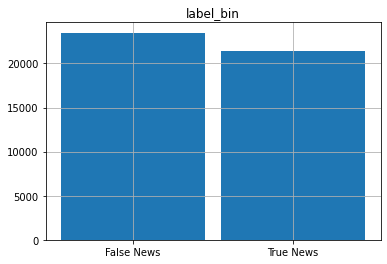

In [157]:
df[["label_bin"]].hist(bins = 3)
plt.bar(np.arange(len([0,1])), df.groupby(["label_bin"]).size().values, 0.9)
plt.xticks(np.arange(len([0,1])), ["False News", "True News"])
plt.show()